# MC for linear regressions using METAS uncLib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from metas_unclib import *
import numpy as np
use_mcprop(n=100000)

In [3]:
vecTemp = np.array([22.25, 16.125, 19, 22.375, 25.625, 28.625, 31.375, 34.1875, 23])
NT = vecTemp.size
covTemp = np.eye(NT)
uvecTemp=ufloatarray(vecTemp, (0.5**2)*covTemp)

In [4]:
vecSens = np.array([0.998607574, 1.000268825, 0.999958121, 0.999638246, 0.999255214, 0.998744568, 0.998172623, 0.997269868, 1.000037044])
NS = vecSens.size
covSens = np.eye(NS)
uvecSens=ufloatarray(vecSens, (0.001**2)*covSens)

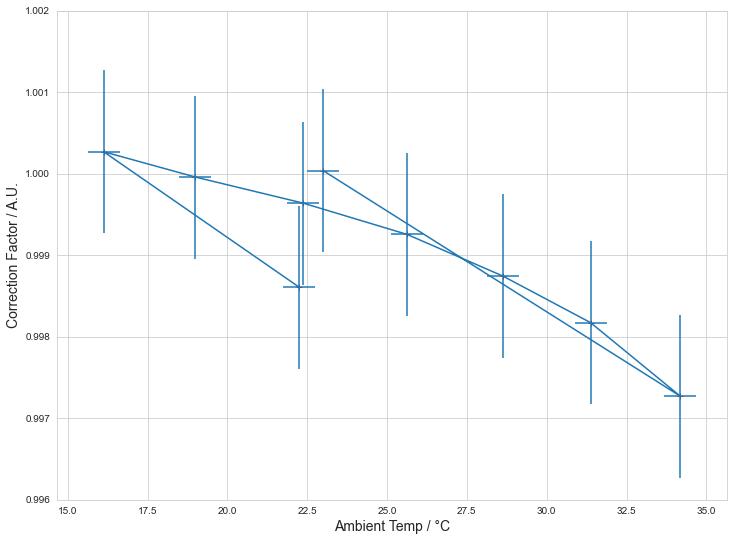

In [23]:
f_err = 1
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(vecTemp, vecSens, 'r+')
plt.errorbar( vecTemp, vecSens, yerr=f_err * 0.001, xerr=f_err*0.5)
ax.set_xlabel('Ambient Temp / °C', fontsize=14)
ax.set_ylabel('Correction Factor / A.U.', fontsize=14)
ax.set_ylim([0.996, 1.002])
plt.savefig('TKlinReg.svg')
plt.show()

In [6]:
p = unumlib.polyfit( uvecTemp, uvecSens, 1)

In [7]:
p

array([-0.00015195792880994165 ± 6.0660091958033065e-05,
       1.0028628835409439 ± 0.0015363938935180324], dtype=object)

In [8]:
p_net_object = p[0].net_object

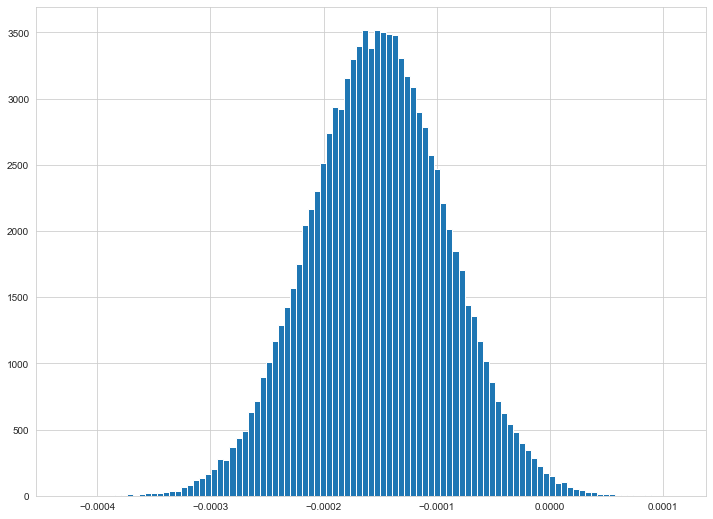

In [9]:
p_values = [float(slope) for slope in p_net_object.values]
fig, ax = plt.subplots(figsize=(12, 9))
h = ax.hist(p_values, bins=101)

In [10]:
p_net_object = p[1].net_object

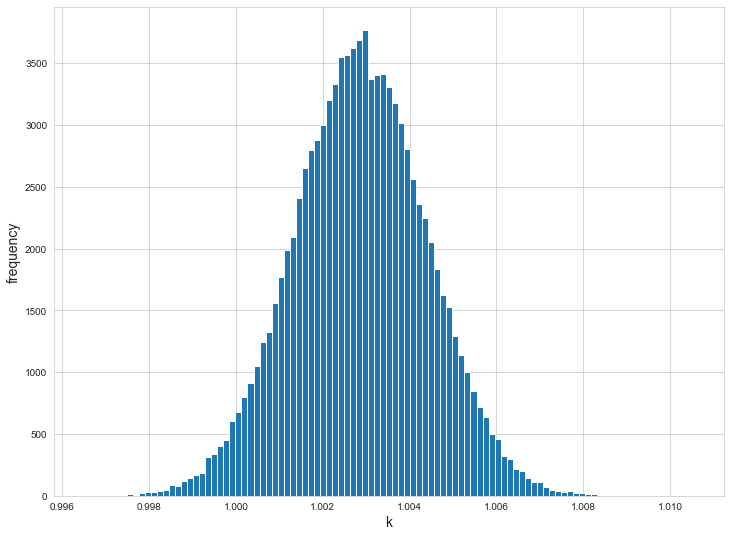

In [21]:
p_values = [float(slope) for slope in p_net_object.values]
fig, ax = plt.subplots(figsize=(12, 9))
h = ax.hist(p_values, bins=101)
ax.set_xlabel('k',fontsize=14)
ax.set_ylabel('frequency',fontsize=14)
plt.savefig('TKlinRegkHist.svg')
plt.show()

In [12]:
pFit=np.polyfit(get_value(uvecTemp),get_value(uvecSens), 1, full=True)
pFit

(array([-1.52779451e-04,  1.00288318e+00]),
 array([1.57620887e-06]),
 2,
 array([1.40578892, 0.15413475]),
 1.9984014443252818e-15)

In [13]:
uvecSensI=unumlib.polyval(p,uvecTemp)

In [14]:
uvecSensI

array([0.9994807318290706 ± 0.00037115835975440895,
       1.0004110481325696 ± 0.0006194326114307695,
       0.9999748584139565 ± 0.00048519352611140176,
       0.9994624625157217 ± 0.00036883374295604635,
       0.9989692501509283 ± 0.00034538322453319894,
       0.9985138976559482 ± 0.00041329997391082346,
       0.9980960860573496 ± 0.000525679201316703,
       0.9976687532886246 ± 0.0006645004114494331,
       0.9993682377009822 ± 0.0003569777922933553], dtype=object)

In [15]:
vPlotTemp = np.linspace(15.,40., 100)
vPlotTemp
vSensPoly = unumlib.polyval(p, vPlotTemp)

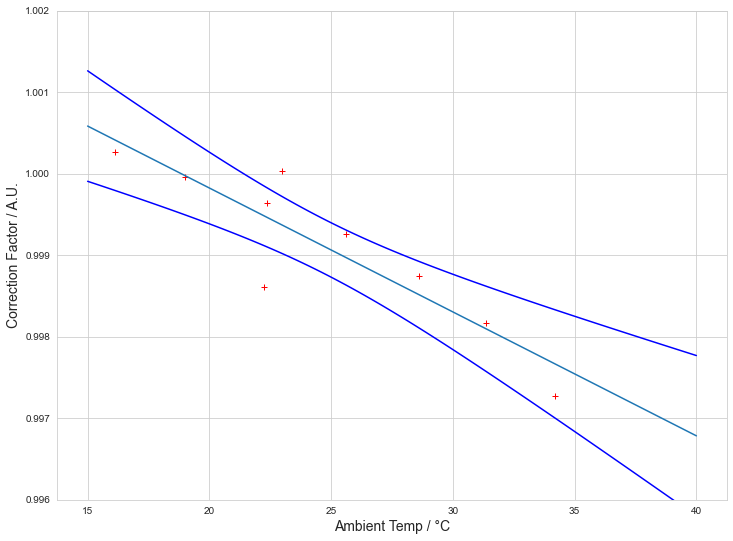

In [24]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(vecTemp, vecSens, 'r+')
ax.plot(vPlotTemp, get_value(vSensPoly))
ax.plot(vPlotTemp, get_value(vSensPoly)+get_stdunc(vSensPoly), 'b')
ax.plot(vPlotTemp, get_value(vSensPoly)-get_stdunc(vSensPoly), 'b')
ax.set_xlabel('Ambient Temp / °C', fontsize=14)
ax.set_ylabel('Correction Factor / A.U.', fontsize=14)
ax.set_ylim([0.996, 1.002])
plt.savefig('TKlinRegErg.svg')
plt.show()